<a href="https://colab.research.google.com/github/jeong-wooseok/ADPfork/blob/master/source/%ED%95%B5%EC%8B%AC%EB%A7%8C%20%EC%9A%94%EC%95%BD%ED%95%9C%20%ED%86%B5%EA%B3%84%EC%99%80%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BD%94%EB%93%9C%EB%B6%81/ch5_%EC%B6%94%EC%A0%95%EA%B3%BC_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주. 확률분포, 추정과 가설검정, 비모수 검정
검증을 보기 전 다음의 정리를 읽어보자<br>
[표준편차와 표준오차 개념, 그리고 표본오차, 오차한계와 오차범위](https://recipesds.tistory.com/entry/%ED%91%9C%EB%B3%B8%ED%8E%B8%EC%B0%A8%EC%99%80-%ED%91%9C%EC%A4%80%EC%98%A4%EC%B0%A8-%EA%B0%9C%EB%85%90-%EA%B7%B8%EB%A6%AC%EA%B3%A0-%ED%91%9C%EB%B3%B8%EC%98%A4%EC%B0%A8-%EC%98%A4%EC%B0%A8%ED%95%9C%EA%B3%84%EC%99%80-%EC%98%A4%EC%B0%A8%EB%B2%94%EC%9C%84%E2%80%A6-%EC%84%A0%EA%B1%B0%EA%B8%B0%EC%82%AC%EB%A5%BC-%EC%9D%BD%EB%8A%94-%EC%9C%A0%EC%8B%9D%ED%95%A8)

## 2강 추정과 가설검정
통계적 추론의 목적은 표본으로부터 모집단에 대한 정보를 얻는것 <br>
모집단의 모수를 추정하거나 가설 검정 하기 위해 표본으로부터 얻은 통계량을 활용한다. 
<br>
> 모수: 모집단의 특성을 나타내는 상수 <br>
> 통계량 : 표본의 특성을 나타내는 상수
<br>


추정은 점추정, 구간추정으로 나뉨<br>
> 점추정 : 단순히 표본평균, 표본분산, 표본비율을 계산하는 방법 <br>
> 구간추정 : 점추정에 오차의 개념을 추가하여 구간으로 모수를 추정하는 방법
<br>

가설검정은 모수의 값을 가정 후, 표본의 통계량을 기준으로 귀무가설을 채택 또는 기각하는 것
> 임계값과 검정통계량을 비교하여 검정통계량이 채택역에 있으면 귀무가설, 기각역에 있으면 대립가설을 채택



### 2.1 일표본 (One-Sample)
- 단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교 <br>
예> 나일강 악어의 평균 몸무게는 30kg이 맞나?<br><br>

![](https://drive.google.com/uc?id=1F3umLnununq6ZbTmF09uOZKNRevo0r_B)

모평균의 추정과 가설검정 : Z분포, t분포
- Z분포 : 표본의 크기가 30이상이거나 모집단의 분산을 아는 경우 <br>
$ Z = \frac{\bar X - \mu}{\sigma / \sqrt n}$
- t분포 : 표본의 크기가 30 미만이고, 모집단의 분산을 모르는 경우 <br>
$ t = \frac{\bar X - \mu}{s / \sqrt n}$


#### 2.1.1 모평균의 추정과 가설검정 : Z분포, t분포

##### 모표준편차를 알거나, 표본의 수가 30 이상


```
Q) 여성가방의 36개의 표본을 확인 결과, 평균가격은 31100원, 표준편차는 4500원이었다. 
신뢰구간 95% 수준에서 얼마의 금액이 있으면 가방을 구매할 수 있을까?


In [ ]:
import numpy as np
x = 31100 #표본평균
n = 36 # 표본크기
sigma = 4500 # 표본표준편차
conf = 0.05 # 구간추정을 위한 유의수준

from scipy.stats import norm
se = sigma / np.sqrt(n) # 표준오차 (standard error)
conf_z = norm.ppf(1-conf/2) # 신뢰구간을 구하기 위한 z통계량 (검정통계량)
me = conf_z * se # 오차한계 = 허용오차(margin of error)

print('[추정]')
print('점 추정량:{:.3f}'.format(x))
print('구간 추정량 : {:.3f}~{:.3f}'.format(x-me,x+me))
print('오차의 한계 : {:.3f}\n'.format(me))

[추정]
점 추정량:31100.000
구간 추정량 : 29630.027~32569.973
오차의 한계 : 1469.973



```
Q) 오차의 한계가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 
표본 규모는 얼마가 되어야 하는가?


In [ ]:
from scipy.stats import norm
me = 500
conf = 1- 0.95
conf_z = norm.ppf(conf/2)
표본규모 = conf_z**2 * sigma**2 / me**2
print('[표본규모]')
print('유의수준 {:.2f} 에서 오차의 한계를 {} 이하로 하려면 표본크기 {:.1f} 이상 \n'.format(conf,me,표본규모))

[표본규모]
유의수준 0.05 에서 오차의 한계를 500 이하로 하려면 표본크기 311.2 이상 



```
모평균이 30000원 이라는 가설을 95% 수준에서 검증하여라


In [ ]:
from scipy.stats import norm
import numpy as np
n=36
x = 31100
mu = 30000
s = 4500 # 표본표준편차
conf = 1 - 0.95 # 유의수준 
se  = s / np.sqrt(n) # 유의확률의 표준오차
zstat = (x - mu) / se # z-value(검정통계량)

conf_z = norm.ppf(1-conf/2) # 유의수준의 검정통계량
me = conf_z * se # 오차한계

ways ='two'

if ways == 'two':
  sp =(1-norm.cdf(np.abs(zstat)))*2
  cv = norm.ppf(1-conf/2)
  cv = '+/-{:3f}'.format(cv)
elif ways == 'oneright':
  sp =(1-norm.cdf(np.abs(zstat)))*2
  cv = norm.ppf(1-conf)
  cv = '{:3f}'.format(cv)
elif ways == 'oneleft':
  sp =(1-norm.cdf(np.abs(zstat)))*2
  cv = norm.ppf(conf)
  cv = '{:3f}'.format(cv)

print('[검정]')
print('임계값 : +/-{}, 검정통계량{:.3f}'.format(cv,zstat))
print('유의수준{:.3f},유의확률{:.3f}'.format(conf,sp))
print('신뢰구간 : {:.3f}~{:.3f}, 검정하고자 하는 값 : {:.0f}\n'.format(x-me,x+me,mu))

[검정]
임계값 : +/-+/-1.959964, 검정통계량1.467
유의수준0.050,유의확률0.142
신뢰구간 : 29630.027~32569.973, 검정하고자 하는 값 : 30000



##### 모표분편차를 모르는 경우

In [ ]:
x = 650
n = 16
s = 55
conf = 0.05
df = n-1

from scipy.stats import t
se = s / np.sqrt(n)
conf_t = t.ppf(1-conf/2, df)
me = conf_t * se

print('[추정]')
print('점 추정량:{:.3f}'.format(x))
print('구간 추정량 : {:.3f}~{:.3f}'.format(x-me,x+me))
print('오차의 한계 : {:.3f}\n'.format(me))

[추정]
점 추정량:650.000
구간 추정량 : 620.693~679.307
오차의 한계 : 29.307



```
오차의 한계가 20 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우 
표본의 규모는 얼마가 되어야 하는가


In [ ]:
me = 20
conf = 1- 0.95
conf_t = t.ppf(conf/2,df)
표본규모 = conf_t**2 * s**2 / me**2
print('[표본규모]')
print('유의수준 {:.2f} 에서 오차의 한계를 {} 이하로 하려면 표본크기 {:.1f} 이상 \n'.format(conf,me,표본규모))

[표본규모]
유의수준 0.05 에서 오차의 한계를 20 이하로 하려면 표본크기 34.4 이상 



```
모평균이 600이라는 가설을 95% 수준에서 검증하여라


In [ ]:
mu = 600
df = n-1

conf = 1 - 0.95 # 유의수준 
se  = s / np.sqrt(n)
tstat = (x - mu) / se # t-value(검정통계량)

conf_t = t.ppf(1-conf/2,df) # p-value(유의확률)
me = conf_t * se # 오차한계

sp =(1-t.cdf(np.abs(tstat), df))*2
cv = t.ppf(1-conf/2, df)
cv = '+/-{:3f}'.format(cv)

print('[검정]')
print('임계값 : +/-{}, 검정통계량{:.3f}'.format(cv,tstat))
print('유의수준{:.3f},유의확률{:.3f}'.format(conf,sp))
print('신뢰구간 : {:.3f}~{:.3f}, 검정하고자 하는 값 : {:.3f}\n'.format(x-me,x+me,mu))

[검정]
임계값 : +/-+/-2.131450, 검정통계량3.636
유의수준0.050,유의확률0.002
신뢰구간 : 620.693~679.307, 검정하고자 하는 값 : 600.000




####  2.1.2 1종 오류와 2종 오류
1종오류(𝛼) : 귀무가설이 참인데 대립가설을 채택하는 경우<br>
2종오류(𝛽) : 대립가설이 참인데 귀무가설을 채택하는 경우 
> 1종오류와 2종오류는 tradeoff관계에 있음 <br>
> 1-𝛽를 검정력(statistical power)이라 함

2종 오류는 검정력이 낮을 때 발생하며, 검정력은 표본의 크기, 유의 수준, 효과 크기 등에 영향을 받습니다. <br>예를 들어, 효과 크기가 작은 경우에는 표본의 크기가 커져야 검정력이 높아져서 2종 오류를 줄일 수 있습니다.

따라서, 검정에서는 1종 오류와 2종 오류를 동시에 고려하여 유의 수준과 검정력을 적절하게 조절해야 합니다.

```
모표준편차를 알 때 1종, 2종 오류문제
Q) 생산공정이 N(100,16)인 정규분포인데 다른 원료로 추출한 샘플 10개의 평균이 97.6이다. 
이 원료 사용시 공정 평균이 종래보다 3kg 만큼 작을 때 이것을 적어도 
확률 90%로 검출하는데 필요한 표본의 크기는? (신뢰도 95%)


In [ ]:
from scipy.stats import norm
import numpy as np

m0 = 100 # 귀무가설의 평균
m1 = 97.6 # 대립가설의 평균00
sigma = 4 # 모집단표준편차

conf_0 = 0.05 # 유의수준
conf_1 = 0.1 # 검정력

conf_z0 = norm.ppf(1-conf_0) # 유의수준의 검정통계량 확인
conf_z1 = norm.ppf(1-conf_1) # 검정력의 검정통계량 확인
표본규모 = (np.abs(conf_z0)+np.abs(conf_z1)) **2/ ((m1-m0)/sigma)**2 # (모집단의 유의수준 alpha의 임계값 = 비교집단의 유의수준 beta 의 임계값)을 계산 
## 

if m1 - m0 < 0 :
  data0 = m0 - conf_z0 * sigma / np.sqrt(표본규모) # 모집단으로 계산  ##
  data1 = m1 - conf_z1 * sigma / np.sqrt(표본규모) # 표본집단으로 계산 ## 
else:
  data0 = m0 + conf_z0 * sigma / np.sqrt(표본규모)
  data1 = m1 + conf_z1 * sigma / np.sqrt(표본규모)

print('유의수준통계량 {:.2f}, 검정력통계량 {:.2f}이려면 표본크기는 {:.1f} 이상이어야 함'.format(conf_z0,conf_z1,표본규모))
print('(이때, 데이터값은 모집단:{:.1f},표본집단:{:.1f})'.format(data0,data1))

유의수준통계량 1.64, 검정력통계량 1.28이려면 표본크기는 23.8 이상이어야 함
(이때, 데이터값은 모집단:98.7,표본집단:96.5)



학교 시험성적 평균이 300점이고 표준편차가 24점이다. <br>
무작위로 64명을 선발해서 시험을 치렀을 때 평균이 310점이고 표준편차는 20점이다.<br>
샘플집단이 모집단과 다름에도 불구하고 같다고 판단할 확률은? <br>(모집단의 유의수준은 0.01)


In [ ]:
m0 = 300
sigma = 24

n = 64
m1 = 310
s = 20
conf_0 = 0.01 # 유의수준

se = sigma / np.sqrt(n) # 표준오차
conf_z0 = np.abs(norm.ppf(conf_0)) # 모집단의 오른쪽 검정통계량

if m1-m0<0:
  data = m0 - conf_z0 * se
  conf_z1 = (data - m1) / (s/np.sqrt(n)) # 표본 기준 검정통계량 (표준화)
  conf_1 = 1 - norm.cdf(conf_z1) # 표준화한 값으로 2종오류 beta의 확률 계산
else: 
  data = m0 + conf_z0 * se

  
  conf_z1 = (data - m1) / (s/np.sqrt(n)) # 표본 기준 검정통계량 (표준화)
  conf_1 = norm.cdf(conf_z1) # 표준화한 값으로 2종오류 beta의 확률 계산

print('1종오류의 경계값 데이터는 {:.3f}, 2종오류의 확률은 {:.3f}, 검정력은 {:.3f}'.format(data,conf_1,1- conf_1))

1종오류의 경계값 데이터는 306.979, 2종오류의 확률은 0.113, 검정력은 0.887


#### 2.1.3 모비율의 추정과 가설검정 : Z분포

표본에서 추출한 표본비율을 통해 모비율을 추정하거나, <br>
원하는 유의수준을 충족할 필요한 표본의 수를 구할 수 있다.
[참고](https://swmh.tistory.com/124)

- 모비율(p)의 추정이나 가설 검정에서 z 분포는 중요한 역할을 합니다. z 분포는 평균이 0, 표준편차가 1인 표준정규분포를 의미합니다. 표본 통계량(예: 표본비율)을 이용하여 모집단의 평균이나 비율을 추정하거나 가설 검정을 할 때, 표본 통계량을 표준화하여 z값을 계산합니다.

- z값은 표본 통계량과 모집단의 모수 사이의 차이를 평균과 표준편차로 나눈 값으로, 표본 통계량이 얼마나 모집단의 모수와 차이가 큰지를 나타냅니다. 이 z값을 표준정규분포의 분포표를 이용하여 p값을 계산하거나, 검정통계량을 구할 때 사용합니다.

- 모비율(p)의 추정에서, z 분포를 이용하여 모비율의 추정값과 신뢰구간을 계산합니다. 표본 통계량인 표본비율(p_hat)과 표본크기(n), 그리고 신뢰수준(1-α)을 이용하여 표준오차(SE)를 계산하고, 이를 이용하여 z값을 계산합니다. 그리고 z값과 표준오차(SE)를 이용하여 신뢰구간을 계산합니다.

- 가설 검정에서도 z 분포를 이용합니다. 귀무가설을 기각할지 말지 결정하기 위해, 표본 통계량(p_hat)과 귀무가설의 모비율(p_0)과의 차이를 SE로 나누어 z값을 계산합니다. 그리고 이 z값과 유의수준(α)을 이용하여 p값을 계산하고, 이 p값이 유의수준보다 작으면 귀무가설을 기각합니다.

어느 화장품 공장에서 500개의 표본에서 추출한 양품의 갯수가 220개이다.
신뢰구간 95% 의 수준에서 검증하여라


In [ ]:
n = 500
p = 220 / 500
conf_0 = 1 - 0.95 # 유의수준
V = p*(1-p) # 베르누이시행의 분산

from scipy.stats import norm
conf_z0 = norm.ppf(1-conf_0/2)
se = np.sqrt(V/n) # 표준오차
me = conf_z0 * se # 오차한계 (margin of error)
print('[추정]')
print('점 추정량 : {:.3f}'.format(p))
print('구간 추정량 : {:.3f} ~ {:.3f}'.format(p-me, p+me))
print('오차한계 : {:.3f}'.format(me))

[추정]
점 추정량 : 0.440
구간 추정량 : 0.396 ~ 0.484
오차한계 : 0.044


```
오차의 한계가 0.03 이하일 확률이 0.99가 되도록 
모집단 비율의 추정치를 원하는 경우, 표본규모는 얼마가 되어야 하는가?


In [ ]:
p = 220 / 500 # 표본집단 확률
conf_0 = 1 - 0.95 # 유의수준
conf_1 = 1 - 0.99 # 허용오차 유의수준
conf_z0 = norm.ppf(1-conf_0/2) # 유의수준과 관련된 z값
표본규모 = conf_z0 **2 * p * (1 - p) / conf_1**2
print('표본규모는 {:.0f}이상 필요'.format(표본규모))

표본규모는 9465이상 필요


#### 2.1.4 모분산의 추정과 가설검정 : 카이제곱 분포

- 모평균/분산을 모르는 경우, 가설 검정 시 표본분산을 기반으로 검정 통계량을 계산, 이 검정 통계량이 카이제곱 분포를 따른다 가정
  + 이를 이용하여 유의수준에 따라 기각역 정의, 검정 결과 판단

In [ ]:
### 모평균을 모르는 경우 모분산 추정
n = 50 # 표본크기
v = 3.4 # 표본분산
dof = n-1 # 자유도
conf_0 = 0.05 # 유의확률

from scipy.stats import chi2
conf_c1 = chi2.ppf(1-conf_0/2, dof) # 우측 검정통계량
conf_c2 = chi2.ppf(conf_0/2, dof) # 좌측 검정통계량
cr1 = dof * v / conf_c1  #(자유도)*분산 / 우측검정통계량
cr2 = dof * v / conf_c2 #(자유도)*분산 / 좌측검정통계량

print("[추정]")
print("점 추정량 : {:.3f}".format(v))
print("구간 추정량 : {:.3f} ~ {:.3f}\n".format(cr1,cr2))

[추정]
점 추정량 : 3.400
구간 추정량 : 2.372 ~ 5.280



In [ ]:
# 가설검정 (왼쪽 검정)
v0 = 3.6 # 귀무가설의 모분산
conf_0 = 0.05
conf_c1 = chi2.ppf(1-conf_0/2, df)
conf_c2 = chi2.ppf(conf_0/2, df)
cr1 = df * v / conf_c1 #
cr2 = df * v / conf_c2 #

cstat = df * v/v0 # 카이제곱 통계량

ways = 'one-left'
sp = chi2.cdf(cstat, df)
cv = chi2.ppf(conf_0, df)

print("[검정]")
print("임계값 : {:.3f}, 검정통계량 : {:.3f}".format(cv, cstat))
print("유의수준 : {:.3f} 유의확률 : {:.3f}\n".format(cr1,cr2))
print("신뢰구간 : {:.3f} ~ {:.3f} 검정하고자 하는 값 :{:.3f}\n".format(cr1,cr2, v0))

[검정]
임계값 : 7.261, 검정통계량 : 14.167
유의수준 : 1.855 유의확률 : 8.144

신뢰구간 : 1.855 ~ 8.144 검정하고자 하는 값 :3.600



### 2.2 이표본 (Two-Sample)
두 집단의 처리를 비교
- 대응표본 : 이벤트 전후의 전후 AB테스트 <br><br>
![](https://drive.google.com/uc?id=1sJYNsYWhNC2BzwdzqBSrNSpWVkjFaQjH)
<br><br>
- 독립표본 : 임의의 두그룹으로 나누어 한그룹에는 A처리, 다른 그룹에는 B처리 <br><br>
![](https://drive.google.com/uc?id=12LJ7AB-MfsJaRX3QU4-a_RKPLIxuNSc5)
<br><br>



[독립표본과 대응표본의 차이](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=khyunji90&logNo=220207849747)



#### 2.2.1 독립표본 모평균 차이의 추정과 가설검정 : Z분포, t분포

```
표본의 크기가 30 이상이고 모집단의 분산을 아는 경우


In [ ]:
import numpy as np
from scipy.stats import norm
x1= 78
x2 = 70
sigma1 = 4.8
sigma2 = 3.1
n1 = 16
n2 = 25
conf_0 = 0.05

d0 = 0
d = x1 - x2
se = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
zstat = (x1-x2-d0) /se
conf_z = norm.ppf(1-conf_0/2) # z분포 활용 
me = conf_z * se

print('[추정]')
print('점추정량 : {:.3f}'.format(d))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(d-me,d+me))
print('오차한계 : {:.3f}\n'.format(me))

# 독립표본 모평균 차이의 가설검정
# H0 : 모평균의 차 가 D0과 같다
# H1 : 모평균의 차 가 D0과 같지않다
conf_0 = 0.05
d = x1 - x2
df = n1 + n2 -2
se = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
zstat =(x1-x2-d0)/se
conf_z = norm.ppf(1-conf_0/2)
me = conf_z * se

ways ='two'
if ways == 'two':
  sp = (1-norm.cdf(np.abs(zstat)))*2
  cv = norm.ppf(1-conf_0/2)
  cv ='+/-{:.3f}'.format(cv)
elif ways =='one-right':
  sp = 1-norm.cdf(zstat)
  cv = norm.ppf(1-conf_0)
  cv ='{:.3f}'.format(cv) 
elif ways =='one-left':
  sp = norm.cdf(zstat)
  cv = norm.ppf(conf_0)
  cv ='{:.3f}'.format(cv) 

print('[검정]')
print('임계값 : {}, 검정통계량 : {:.3f}'.format(cv,zstat))
print('유의수준 : {}, 유의확률률 : {:.3f}'.format(conf_0,sp))
print('신뢰구간 : {:.3f} ~ {:.3f}, 검정하고자 하는 값 : {:.3f}'.format(d-me,d+me,d0))

[추정]
점추정량 : 8.000
구간추정량 : 5.353 ~ 10.647
오차한계 : 2.647

[검정]
임계값 : +/-1.960, 검정통계량 : 5.923
유의수준 : 0.05, 유의확률률 : 0.000
신뢰구간 : 5.353 ~ 10.647, 검정하고자 하는 값 : 0.000


```
표본의 크기가 30 미만이고 모집단의 분산을 모르지만 같다는 것을 알고 있을 때


In [ ]:
## 독립표본 모평균 차이의 추정정
import numpy as np
from scipy.stats import t
x1= 85
x2 = 81
s1 = 4
s2 = 5
n1 = 12
n2 = 10
conf_0 = 0.05

d0 = 0
d = x1 - x2
df = n1 + n2 - 2 # 자유도
pv = (s1**2*(n1-1)+s2**2*(n2-1))/df #합동분산 (pooled variance)
se = np.sqrt(pv) * np.sqrt(1/n1+1/n2) # standard error
tstat = (x1-x2-d0) /se
conf_t = t.ppf(1-conf_0/2, df) # t분포 활용 
me = conf_t * se

print('[추정]')
print('점추정량 : {:.3f}'.format(d))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(d-me,d+me))
print('오차한계 : {:.3f}\n'.format(me))

## 독립표본 모평균 차이의 가설검정
# H0 : 모평균의 차 가 D0과 같다
# H1 : 모평균의 차 가 D0과 같지않다
conf_0 = 0.05
d = x1 - x2
df = n1 + n2 -2
pv = (s1**2*(n1-1)+s2**2*(n2-1))/df #합동분산 (pooled variance)
se = np.sqrt(pv) * np.sqrt(1/n1+1/n2) # standard error
tstat =(x1-x2-d0)/se
conf_t = t.ppf(1-conf_0/2, df) # t분포 활용 
me = conf_t * se

ways ='two'
if ways == 'two':
  sp = (1-t.cdf(np.abs(tstat),df))*2
  cv = t.ppf(1-conf_0/2, df)
  cv ='+/-{:.3f}'.format(cv)
elif ways =='one-right':
  sp = 1-t.cdf(tstat,df)
  cv = norm.ppf(1-conf_0,df)
  cv ='{:.3f}'.format(cv) 
elif ways =='one-left':
  sp = norm.cdf(tstat,df)
  cv = norm.ppf(conf_0,df)
  cv ='{:.3f}'.format(cv) 

print('[검정]')
print('임계값 : {}, 검정통계량 : {:.3f}'.format(cv,tstat))
print('유의수준 : {}, 유의확률 : {:.3f}'.format(conf_0,sp))
print('신뢰구간 : {:.3f} ~ {:.3f}, 검정하고자 하는 값 : {:.3f}'.format(d-me,d+me,d0))

[추정]
점추정량 : 4.000
구간추정량 : 0.001 ~ 7.999
오차한계 : 3.999

[검정]
임계값 : +/-2.086, 검정통계량 : 2.086
유의수준 : 0.05, 유의확률 : 0.050
신뢰구간 : 0.001 ~ 7.999, 검정하고자 하는 값 : 0.000


```
표본의 크기가 30 미만이고 모집단의 분산을 모르지만 다르다는 것을 알고 있을 때


In [ ]:
## 독립표본 모평균 차이의 추정정
import numpy as np
from scipy.stats import t
x1= 85
x2 = 81
s1 = 4
s2 = 5
n1 = 12
n2 = 10
conf_0 = 0.05

d0 = 0
d = x1 - x2
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
se = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0) /se
conf_t = t.ppf(1-conf_0/2, df) # t분포 활용 
me = conf_t * se

print('[추정]')
print('점추정량 : {:.3f}'.format(d))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(d-me,d+me))
print('오차한계 : {:.3f}'.format(me))
print('자유도 : {:.3f}\n'.format(df))

## 독립표본 모평균 차이의 가설검정
# H0 : 모평균의 차 가 D0과 같다
# H1 : 모평균의 차 가 D0과 같지않다
conf_0 = 0.05
d0 = 0
d = x1 - x2
df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
se = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0) /se
conf_t = t.ppf(1-conf_0/2, df) # t분포 활용 
me = conf_t * se

ways ='two'
if ways == 'two':
  sp = (1-t.cdf(np.abs(tstat),df))*2
  cv = t.ppf(1-conf_0/2, df)
  cv ='+/-{:.3f}'.format(cv)
elif ways =='one-right':
  sp = 1-t.cdf(tstat,df)
  cv = norm.ppf(1-conf_0,df)
  cv ='{:.3f}'.format(cv) 
elif ways =='one-left':
  sp = norm.cdf(tstat,df)
  cv = norm.ppf(conf_0,df)
  cv ='{:.3f}'.format(cv) 

print('[검정]')
print('임계값 : {}, 검정통계량 : {:.3f}'.format(cv,tstat))
print('유의수준 : {}, 유의확률 : {:.3f}'.format(conf_0,sp))
print('신뢰구간 : {:.3f} ~ {:.3f}, 검정하고자 하는 값 : {:.3f}'.format(d-me,d+me,d0))

[추정]
점추정량 : 4.000
구간추정량 : -0.128 ~ 8.128
오차한계 : 4.128
자유도 : 17.165

[검정]
임계값 : +/-2.108, 검정통계량 : 2.043
유의수준 : 0.05, 유의확률 : 0.057
신뢰구간 : -0.128 ~ 8.128, 검정하고자 하는 값 : 0.000


In [ ]:
from scipy.stats import ttest_ind
X1 = [1,2,3,7,9]
X2 = [9,11,13,15]
tstatt, pt = ttest_ind(X1, X2, equal_var = True) #모집단의 분산이 동일한지 여부
tstatf, pf = ttest_ind(X1, X2, equal_var = False) #모집단의 분산이 동일한지 여부

print('[라이브러리 검정] equal_var = True')
print('검정통계량 : {:.3f}, 유의확률 : {:.3f}'.format(tstatt, pt))
print('[라이브러리 검정] equal_var = False')
print('검정통계량 : {:.3f}, 유의확률 : {:.3f}'.format(tstatf, pf))

[라이브러리 검정] equal_var = True
검정통계량 : -3.657, 유의확률 : 0.008
[라이브러리 검정] equal_var = False
검정통계량 : -3.787, 유의확률 : 0.007


#### 2.2.2 대응표본 모평균 차이의 추정과 가설 검정 : Z분포, t분포
서로 다른 두 집단의 비교

```
표본의 크기가 30 이상인 경우 : z분포 활용


In [ ]:
from scipy.stats import norm
import numpy as np
x1= np.random.randint(30,50,1000) # 0에서 100 사이의 숫자를 랜덤으로 40개 추출
x2= np.random.randint(30,50,1000) # 50에서 100 사이의 숫자를 랜덤으로 40개 추출
n = len(x1)
df = n-1
conf_0 = 0.05

d0 = 0
d = x1-x2 # 두 데이터 차이
d_mean = np.mean(d) # 두 데이터 차이의 평균
d_std = np.sqrt(sum((d-d_mean)**2) / df)
se = d_std / np.sqrt(n) # 표준오차
zstat = (d_mean - d0) / se
conf_z = norm.ppf(1-conf_0/2)
me = conf_z * se

print('[추정]')
print('점추정량 : {:.3f}'.format(d_mean))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(d_mean-me,d_mean+me))
print('오차한계 : {:.3f}\n'.format(me))

## 검정을 해보자 

'''
H0 : 모평균의 차이가 D0과 같다 (두집단은 모평균의 차이가 없다)
H1 : 두집단은 모평균의 차이가 없지 않다.
'''
conf_0 = 0.05
d0 = 0
d = x1-x2 # 두 데이터 차이
d_mean = np.mean(d) # 두 데이터 차이의 평균
d_std = np.sqrt(sum((d-d_mean)**2) / df)
se = d_std / np.sqrt(n) # 표준오차
zstat = (d_mean - d0) / se
conf_z = norm.ppf(1-conf_0/2)
me = conf_z * se

ways ='two'
if ways == 'two':
  sp = 1-norm.cdf(np.abs(zstat))
  cv = norm.ppf(1-conf_0/2)
  cv ='+/-{:.3f}'.format(cv)
elif ways =='one-right':
  sp = 1-norm.cdf(zstat)
  cv = norm.ppf(1-conf_0)
  cv ='{:.3f}'.format(cv) 
elif ways =='one-left':
  sp = norm.cdf(zstat)
  cv = norm.ppf(conf_0)
  cv ='{:.3f}'.format(cv) 

print('[검정]')
print('임계값 : {}, 검정통계량 : {:.3f}'.format(cv,zstat))
print('유의수준 : {}, 유의확률 : {:.3f}'.format(conf_0,sp))
print('신뢰구간 : {:.3f} ~ {:.3f}, 검정하고자 하는 값 : {:.3f}\n'.format(d_mean-me,d_mean+me,d0))

# ttest_rel 는 t분포 검정을 활용한 것으로 z분포 검정에는 사용하지 않도록 한다. 

[추정]
점추정량 : -0.206
구간추정량 : -0.730 ~ 0.318
오차한계 : 0.524

[검정]
임계값 : +/-1.960, 검정통계량 : -0.771
유의수준 : 0.05, 유의확률 : 0.220
신뢰구간 : -0.730 ~ 0.318, 검정하고자 하는 값 : 0.000



``` 
표본 크기가 30 미만인 경우 : t분포 활용



In [ ]:
import numpy as np
x1 = np.array([81, 79, 93, 80, 76, 75, 81, 92, 88, 79, 90, 78, 91, 77, 89, 90, 88, 82, 85, 83])
x2 = np.array([82, 77, 78, 85, 86, 76, 75, 75, 85, 75, 83, 88, 77, 76, 86, 90, 88, 88, 75, 77])
n= len(x1)
df= n-1 
conf_0 = 0.05

d0= 0
d = x1 - x2
d_mean = np.mean(d)
d_std = np.sqrt(sum((d-d_mean)**2) / df)
se = d_std / np.sqrt(n)
tstat = (d_mean - d0) / se
conf_t = t.ppf(1-conf_0/2,df)
me = conf_t * se


print('[추정]')
print('점추정량 : {:.3f}'.format(d_mean))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(d_mean-me,d_mean+me))
print('오차한계 : {:.3f}\n'.format(me))


d0= 0
d = x1 - x2
d_mean = np.mean(d)
d_std = np.sqrt(sum((d-d_mean)**2) / df)
se = d_std / np.sqrt(n)
tstat = (d_mean - d0) / se
conf_t = t.ppf(1-conf_0/2,df)
me = conf_t * se

ways ='two'
if ways == 'two':
  sp = (1-t.cdf(np.abs(tstat),df))*2
  cv = t.ppf(1-conf_0/2, df)
  cv ='+/-{:.3f}'.format(cv)
elif ways =='one-right':
  sp = 1-t.cdf(tstat,df)
  cv = norm.ppf(1-conf_0,df)
  cv ='{:.3f}'.format(cv) 
elif ways =='one-left':
  sp = norm.cdf(tstat,df)
  cv = norm.ppf(conf_0,df)
  cv ='{:.3f}'.format(cv) 

print('[검정]')
print('임계값 : {}, 검정통계량 : {:.3f}'.format(cv,tstat))
print('유의수준 : {}, 유의확률 : {:.3f}'.format(conf_0,sp))
print('신뢰구간 : {:.3f} ~ {:.3f}, 검정하고자 하는 값 : {:.3f}\n'.format(d_mean-me,d_mean+me,d0))

from scipy.stats import ttest_rel
tstat, pt = ttest_rel(x1, x2, alternative = 'two-sided')
print('[라이브러리검정]')
print('검정통계량 : {:.3f}, 유의확률:{:.3f}'.format(tstat,pt))

# t분포를 활용한 검정은 ttest_rel 라이브러리로 바로 사용해도 무관하니 참고하자!

[추정]
점추정량 : 2.750
구간추정량 : -0.781 ~ 6.281
오차한계 : 3.531

[검정]
임계값 : +/-2.093, 검정통계량 : 1.630
유의수준 : 0.05, 유의확률 : 0.120
신뢰구간 : -0.781 ~ 6.281, 검정하고자 하는 값 : 0.000

[라이브러리검정]
검정통계량 : 1.630, 유의확률:0.120


#### 2.2.3 독립표본 모비율 차이의 추정과 가설검정 : Z분포
예 > 강남학교가 강북학교보다 사법고시를 많이 합격하나?

In [ ]:
n1 = 250
p1 = 120/250 
n2 = 150
p2 = 60/150

conf_0 = 0.05

from scipy.stats import norm
d = p1-p2
conf_z = norm.ppf(1-conf_0/2) # twoway이므로 /2
se = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2) 
me = conf_z * se

print('[추정]')
print('점추정량 : {:.3f}'.format(d))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(d-me,d+me))
print('오차한계 : {:.3f}\n'.format(me))

## 독립표본 모비율 차이의 가설검정
# H0 : 두집단 간의 모비율 차이가 없다.
# H1 : 두집단 간의 모비율 차이가 있다.

pe = (n1*p1+n2*p2)/(n1+n2) # Pooled estimate
se2 = np.sqrt(pe*(1-pe)/(n1+n2))
zstat = d /se2
conf_z = norm.ppf(1-conf_0/2)
me2 = conf_z * se2

ways ='one-right' # 
if ways == 'two':
  sp = 1-norm.cdf(np.abs(zstat))
  cv = norm.ppf(1-conf_0/2)
  cv ='+/-{:.3f}'.format(cv)
elif ways =='one-right':
  sp = 1-norm.cdf(zstat)
  cv = norm.ppf(1-conf_0)
  cv ='{:.3f}'.format(cv) 
elif ways =='one-left':
  sp = norm.cdf(zstat)
  cv = norm.ppf(conf_0)
  cv ='{:.3f}'.format(cv) 

print('[검정]')
print('임계값 : {}, 검정통계량 : {:.3f}'.format(cv, zstat))
print('유의수준 : {}, 유의확률 : {:.3f}'.format(conf_0,sp))
print('신뢰구간 : {:.3f} ~ {:.3f}, 검정하고자 하는 값 : {:.3f}\n'.format(d-me,d+me,d0))
# 추정시에는 대표본 근사분산을 가설검정시에는 합동분산을 사용하였다.

[추정]
점추정량 : 0.080
구간추정량 : -0.020 ~ 0.180
오차한계 : 0.100

[검정]
임계값 : 1.645, 검정통계량 : 3.216
유의수준 : 0.05, 유의확률 : 0.001
신뢰구간 : -0.020 ~ 0.180, 검정하고자 하는 값 : 0.000



#### 2.2.4 대응표본 모분산 비의 추정과 가설 검정 : F분포
두 모집단의 분산을 비교하는 경우 분산의 차이를 비교하지 않고, 분산비를 계산한다.<br>
(이 분산비가 1보다 큰지 작은지 여부를 확인)

In [ ]:
import numpy as np
from scipy.stats import f 
sample1 = [272,255,278,282,296,312,356,296,302,312]
sample2 = [276,280,369,285,303,317,290,250,313,307]
n1= len(sample1)
n2= len(sample2)
df1 =n1-1
df2 =n2-1
v1= np.std(sample1,ddof=1)**2 
v2= np.std(sample2,ddof=1)**2 
conf_0 = 0.05

fstat = v1/v2
f1 = f.ppf(conf_0/2, df1,df2)
f2 = f.ppf(1-conf_0/2, df1,df2)
cr1 = f1 *fstat
cr2 = f2 *fstat

print('[추정]')
print('점추정량 : {:.3f}'.format(fstat))
print('구간추정량 : {:.3f} ~ {:.3f}'.format(cr1,cr2))

## 모분산비의 가설검정




[추정]
점추정량 : 0.764
구간추정량 : 0.190 ~ 3.075


### 2.3 분산분석의 가정
분산분석은 3개 이상의 집단의 모평균 차이를 검정하기 위해<br> 전체 제곱합과 자유도를 처리와 오차로 분할하는 과정<br>

분산분석 시행을 위해 충족해야하는 가정으로는,
- 정규성 : 각 표본의 반응변수는 정규분포여야 함
  + Shapiro(소규모샘플), Daling anderson(대규모샘플), 콜모고로프 스미르노프, Jarque bera, QQ plot 등
  + 귀무가설(H0) : 표본의 모집단이 정규분포와 차이가 없다 (정규성 만족)
- 등분산성 : 집단의 반응변수의 분산이 동일
  + Bartlett 검정 (정규성만족하는 샘플), Levene 검정 (정규성만족하지 않는 샘플)
  + 귀무가설(H0) : 집단간 모분산에는 차이가 없다 (등분산 만족)


#### 2.3.1 정규성 검정


shapiro : 0.993 (p 0.869)
anderson : 0.181 (critical value 0.759 significant level 0.050)
kstest : 0.058 (p 0.867)
jarque_bera : 0.597 (p 0.742)


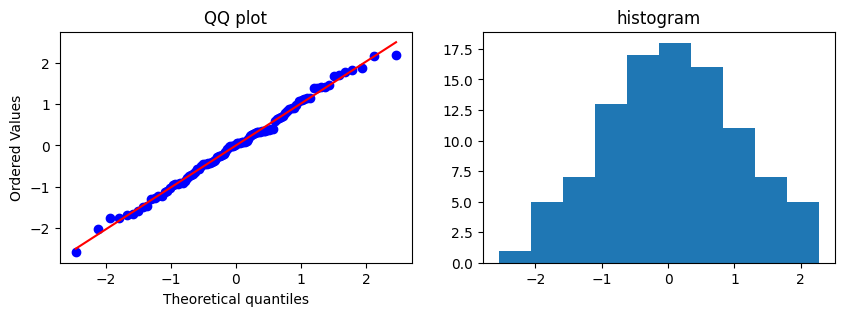

In [ ]:
from scipy.stats import norm
data = norm.rvs(size = 100, random_state=0) # 정규성을 만족하는 크기 100의 표본생성

from scipy.stats import shapiro, anderson, jarque_bera, kstest,zscore, probplot
# H0 : 표본 모집단이 정규성을 만족한다. 
# H1 : 표본 모집단이 정규성을 만족하지 않는다.

# Shapiro : 검정통계량, p- value를 반환
sstat, p  = shapiro(data)
print('shapiro : {:.3f} (p {:.3f})'.format(sstat,p))

# darling anderson : 검정통계량, 임계치, 유의수준을 반환 
astat, cv, sl = anderson(data, dist = 'norm')
print('anderson : {:.3f} (critical value {:.3f} significant level {:.3f})'.format(astat,cv[2], sl[2]*0.01))

# kstest (콜모고로프 스미르노프) : 검정통계량, p- value를 반환
kstat, p = kstest(data, cdf = norm.cdf)
print('kstest : {:.3f} (p {:.3f})'.format(kstat,p))

# jarque_bera :검정통계량, p- value, 왜도, 첨도 를 반환환
jstat, p = jarque_bera(data)
print('jarque_bera : {:.3f} (p {:.3f})'.format(jstat,p))

# QQ plot and histogram
import matplotlib.pyplot as plt
%matplotlib inline
zdata = zscore(data)
fig, ax = plt.subplots(1,2,figsize=(10,3))

# QQ plot : 데이터들이 대각선에 붙어있을수록 정규성을 만족하는 것으로 본다
(osm, odr), (slope, intercept,r) = probplot(zdata, plot = ax[0])
ax[0].set_title('QQ plot')

# histogram 
ax[1].hist(data)
ax[1].set_title('histogram')
plt.show()

#### 2.3.2 K표본 등분산 검정(Levene)

In [ ]:
# 표본수가 동일한 Levene 검정
import pandas as pd
data = pd.DataFrame({'fac1':[48,54,57,54,62,74],
                     'fac2':[73,63,66,64,74,80],
                     'fac3':[51,63,61,54,56,82]})
# H0 : 모든 그룹들의 모분산은 동일하다
# H1 : 그룹들 중 적어도 한 그룹의 모분산이 동일하지 않다

# 수작업업
n1 = len(data['fac1'])
n2 = len(data['fac2'])
n3 = len(data['fac3'])
N = n1 + n2 + n3
k = data.shape[1] # 시료 그룹의 수 (수준수)
df1 = k - 1 # 모집단 자유도
df2 = N - k # 오차 자유도
df3 = N - 1 # 전체 자유도

means = np.array(data.mean(axis=0)) # 모집단별 평균, 각 수준의 평균
zij1 = np.abs(data['fac1']-means[0])
zij2 = np.abs(data['fac2']-means[0])
zij3 = np.abs(data['fac3']-means[0])
zi1 = zij1.mean()
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum()+zij3.sum())/(len(zij1)+len(zij2)+len(zij3))
#z = 전체 zij의 평균

F = df2 / df1 * (n1 * (zi1-z)**2 + n2*(zi2-z)**2 + n3*(zi3-z)**2) / sum((zij1-zi1)**2 + (zij2-zi2)**2 + (zij3-zi3)**2)

from scipy.stats import f
cv = f.ppf(1-conf_0, df1, df2) # cv보다 크면 기각
sp = 1 - f.cdf(F,df1,df2)

print('[수기검정]')
print('오른쪽 검정의 임계값 : {:.3f}, 검정통계량 : {:.3f}'.format(cv,F))
print('유의수준 : {:.3f}, 유의확률 : {:.3f}\n'.format(conf_0, sp))

# 라이브러리 검정 : 표본 수가 같든든지 다르든지 상관이 없다.
from scipy.stats import levene
lstat, p = levene(data['fac1'],data['fac2'],data['fac3'], center ='mean')
print('[라이브러리 검정]')
print('stat {:.3f}, p-value {:.3f}\n'.format(lstat,p))

[수기검정]
오른쪽 검정의 임계값 : 3.682, 검정통계량 : 1.006
유의수준 : 0.050, 유의확률 : 0.389

[라이브러리 검정]
stat 0.176, p-value 0.840



In [ ]:
# 표본수가 다른 Levene 검정
from scipy.stats import levene
data = [[36,41,42,49],[40,48,39,45,44],[35,37,42,34,32]]
lstat, p = levene(data[0],data[1],data[2], center ='mean')
print('[라이브러리 검정]')
print('stat {:.3f}, p-value {:.3f}\n'.format(lstat,p))

[라이브러리 검정]
stat 0.096, p-value 0.909



#### 2.3.3 K표본 등분산 검정(Bartlett)

In [ ]:
# 라이브러리 검정 : 표본수가 같든지 다르던지 상관이 없다.
from scipy.stats import bartlett

# 정규성 샘플 생성
data1 = norm.rvs(size=50, random_state =0)
data2 = norm.rvs(size=50, random_state =1)
data3 = norm.rvs(size=50, random_state =2)

bstat, p = bartlett(data1, data2, data3)
print('[라이브러리 검정]')
print('stat {:.3f}, p-value {:.3f}\n'.format(bstat,p))

[라이브러리 검정]
stat 1.082, p-value 0.582



### 2.4 분산분석 
T검정이 두 집단간의 평균 차이를 비교하는 통계 분석 방법이라면 <br>
분산분석은 두개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법<br>
- 두개 이상의 집단들의 평균이 같은가?<br>
- 분산분석의 종류

구분|명칭|독립변수개수|종속변수개수|
----|----|----|----|
단일변량분산분석|onewayANOVA|1개|1개|
|twowayANOVA|2개|1개|
다변량분산분석|MANOVA|1개 이상|2개 이상|








#### 2.4.1 등분산인 one-way ANOVA
- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기위해 사용되는 검증방법
- 모집단의 수에는 제한이 없으며 각 표본의 수는 같지 않아도 된다
- F검정통계량을 이용<br>
![](https://drive.google.com/uc?id=1vfIU8dB8BCzL0_0hsBQoj1KR8UhUfdBJ)<br><br>



요인|제곱합|자유도|평균제곱|F-value|
----|----|----|----|----|
집단 간|SSB|집단수-1|집단간제곱합/자유도|
집단 내|SSW|자료수-집단수|집단내제곱합/자유도|집단간평균제곱|
합 계 |TSS|자료수-1|-|/집단내평균제곱

- 가정 : 집단간 측정치는 서로 독립적, 정규분포 따르고, 분산은 같다.
- 가설
  + H0 : k개의 집단 간 모평균에는 차이가 없다. 즉 같다고 할 수 있음 
  + H1 : k개의 집단 간 모평균이 모두 같다고 할 수는 없음
- 사후검정 
  + 분산분서의 결과, 귀무가설이 기각되어 적어도 한집단에서 평균의 차이가 통계적으로 증명만 가능 
  + 하지만 정확히 어느 그룹의 평균값이 의미가 있는지는 알려주지 않기에 따라서 추가적인 사후분석(Post Hoc Analysis) 이 필요

[statsmodels활용한 ANOVA](https://partrita.github.io/posts/ANOVA-python/)


In [ ]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'A0':[48,54,57,54,62,74],
    'A1':[73,63,66,64,74,80],
    'A2':[51,63,61,54,56,82],
    'A3':[81,74,76,78,73,70]})
conf_0 = 0.05
print('데이터 확인')
print(data)
print()

means = np.array(data.mean(axis=0)) # 모집단(수준)별 평균
mu = np.mean(data.values) # 전체 평균
Vs = np.array(data.std(axis=0, ddof = 1)**2) # 모집단(수준)별 평균
n = len(data.values.flatten()) #표본전체개수
k = data.shape[0] # 모집단 별 표본개수
level = data.shape[1] # 모집단(수준)의 개수
dfr = level -1 # 모집단(수준) 자유도
dfe = n - dfr - 1  # 오차 자유도 

print('[수기검정]')
print('수준 별 평균', means.round(2))
print('수준 별 표본의 분산', Vs.round(2))
print('자유도 {},{}\n'.format(dfr, dfe))

# H0 : 모든 모집단의 평균이 동일하다
# H1 : 모든 모집단의 평균이 동일한 것은 아니다.
SSR = (k * (means-mu)**2).sum() # 처리제곱 : 처리 평균들과 전체 평균의 제곱합
SSE = ((k-1)*Vs).sum() # 오차제곱 : 처리분산들과 오차 자유도를 곱한 합
SST = ((data.values - mu)**2).sum() # SSR + SSE
MSR = SSR/dfr
MSE = SSE/dfe
F = MSR / MSE
print("SSR : {:.3f}, SSE : {:.3f}, SST : {:.3f}".format(SSR,SSE,SST))
print("MSR : {:.3f}, MSE : {:.3f}, F : {:.3f}\n".format(MSR,MSE,F))

from scipy.stats import f
cv = f.ppf(1-conf_0, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)
print('오른쪽 검정의 임계값 : {:.3f}, 검정통계량 :{:.3f}'.format(cv,F))
print('유의수준 : {:.3f}, 유의확률 :{:.3f}\n'.format(conf_0, sp))

#라이브러리
print('[라이브러리 검정]')
from  statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data.melt()['value'],
                  groups = data.melt()['variable'],
                  use_var = 'equal')
print('stat : {:.3f}, p-value : {:.3f}\n'.format(oa.statistic, oa.pvalue))

데이터 확인
   A0  A1  A2  A3
0  48  73  51  81
1  54  63  63  74
2  57  66  61  76
3  54  64  54  78
4  62  74  56  73
5  74  80  82  70

[수기검정]
수준 별 평균 [58.17 70.   61.17 75.33]
수준 별 표본의 분산 [ 80.97  45.2  123.77  15.07]
자유도 3,20

SSR : 1126.333, SSE : 1325.000, SST : 2451.333
MSR : 375.444, MSE : 66.250, F : 5.667

오른쪽 검정의 임계값 : 3.098, 검정통계량 :5.667
유의수준 : 0.050, 유의확률 :0.006

[라이브러리 검정]
stat : 5.667, p-value : 0.006



사후분석을 진행

[라이브러리 검정]
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1  11.8333 0.0874  -1.3197 24.9863  False
    A0     A2      3.0 0.9183  -10.153  16.153  False
    A0     A3  17.1667 0.0079   4.0137 30.3197   True
    A1     A2  -8.8333 0.2679 -21.9863  4.3197  False
    A1     A3   5.3333 0.6729  -7.8197 18.4863  False
    A2     A3  14.1667 0.0319   1.0137 27.3197   True
-----------------------------------------------------


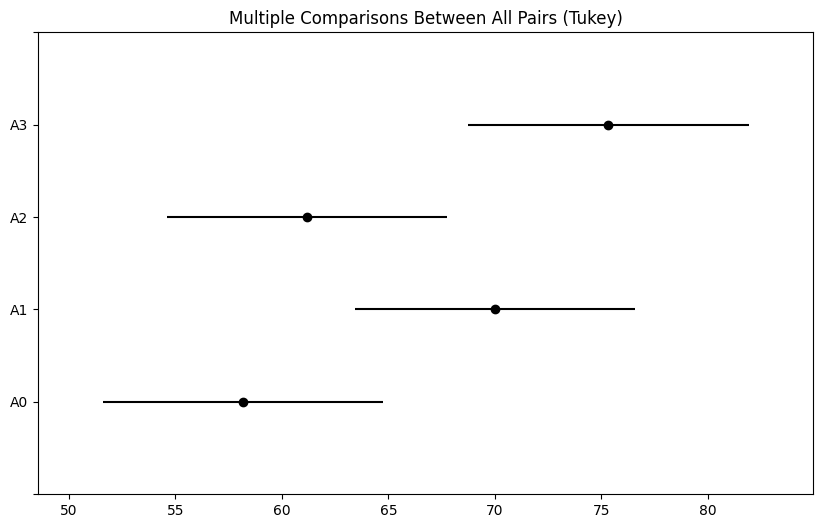

In [ ]:
# 사후 검정 (정규성 0, 등분산 0, 샘플사이즈 동일 0 - Tukey HSD)
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

print('[라이브러리 검정]')
org_data = data.melt()
mc = MultiComparison(data = org_data['value'],
                     groups=org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)
mc.plot_simultaneous()
plt.show()

- 사후검정 결과 A0-A2, A2-A3 간의 모평균의 차이가 있는 것으로 확인하였다
- meandiff는 각 그룹간 모평균 차의 점 추정량이고 lower ~ upper는 모평균차의 신뢰구간을 나타낸다.
- p-adj는 조정된 p-value로서 유의수준 0.05보다 적은 경우 reject True로 판별되어 귀무가설을 기각하게 된다.



[one-way ANOVA 비정규 실습](https://velog.io/@robin_dev/Python-%ED%86%B5%EA%B3%84-%EC%8B%A4%EC%8A%B5-%EC%9D%BC%EC%9B%90-%EB%B6%84%EC%82%B0-%EB%B6%84%EC%84%9D-one-way-ANOVA)

#### 2.4.2 이분산인 two-way ANOVA
[onewayANOVA와의 차이](https://m.blog.naver.com/sw4r/221879802736) : 독립변수를 두개로 비교함 <br>
예> 성별과 학년에 따른 시험점수의 차이
- 두개의 독립변수 A, B 사이에 상관관계가 있는지를 살펴보는 교호작용에 대한 검증이 반드시 진행되어야 한다.
 + SST  = 총 오차제곱합
 + SSA  = 요인 A수준 평균값들 사이의 제곱합
 + SSB  = 요인 B수준 평균값들 사이의 제곱합 
 + SSE  = 오차제곱합 | SSW : 집단내 변화량
- 가정
  + 집단의 측정치는 서로 독립적이며 정규분포를 따른다
  + 집단 측정치의 분산은 같다 (등분산 가정)
- 가설 : 이원배치분산의 귀무가설은 3개
  + H0_1 : a변수와 b변수간의 교호작용이 없다.
  + H0_2 : a변수에 따라 종속변수의 값에는 차이가 없다.
  + H0_3 : b변수에 따라 종속변수의 값에는 차이가 없다


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
mtcars = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv',index_col=0)
mtcars = mtcars[['mpg',	'cyl', 'am']] 

fm = 'mpg ~ C(cyl) +C(am)+ C(cyl):C(am)'
model = ols(fm, mtcars).fit()
result = anova_lm(model)
result.round(2)

,df,sum_sq,mean_sq,F,PR(>F)
C(cyl),2.0,824.78,412.39,44.85,0.00
C(am),1.0,36.77,36.77,4.00,0.06
C(cyl):C(am),2.0,25.44,12.72,1.38,0.27
Residual,26.0,239.06,9.19,NaN,NaN


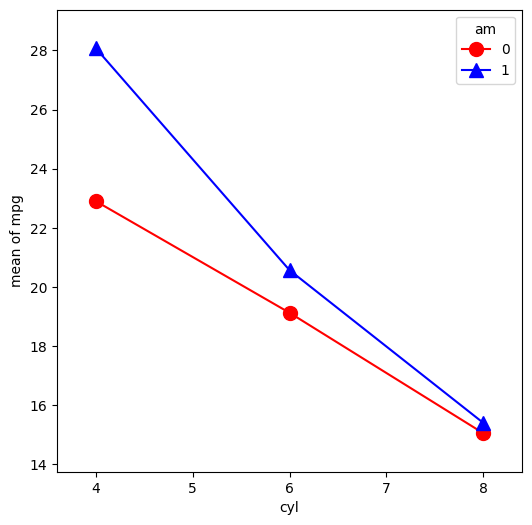

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl,am,mpg, 
colors =['red','blue'], markers = ['o','^'],
ms=10, ax = ax)

이진변수인 0,1을 확인함으로써 cyl 변수와 am 변수 사이에 교호작용이 없음을 확인하였다.


### 2.5 교차분석 (카이제곱검정)
- 교차분석은 관찰빈도와 기대빈도가 유의미한 차이가 있는지 검정
- 종속변수가 범주형일 때 카이제곱 사용 vs t-test / ANOVA는  연속형
  + 종속변수의 분포 설명 or 두개 이상의 범주형 변수가 상관이 있는지 검정하는 목적
- 교차표를 통해 알아보자

구분|환자군|대조군|전체|
----|----|----|----|
과체중|25|15|40(40%)|
정상|10|50|60(60%)|
전체|35(35%)|65(65%)|100(100%)|

+  과체중 관찰빈도 25명, 기대빈도 35*40% = 14명임. 이 차이가 유의한 의미가 있는지 카이제곱 통계량을 이용하여 검정
    + 각 범주의 기대 빈도는 5이상이어야 한다.



카이 제곱 검정은 적합성 검정과 독립성 검정이 잇다


#### 2.5.1 적합성 검정
- 범주 데이터의 빈도 분포가, 기대 분포를 따르는가
    + 예 > 주사위를 굴렸을 때 각 주사위의 값이 1/6 확률이 맞나

- scipy.stats.chisquare(f_obs, f_exp, axis = 0)

매개변수|설명|
----|----|
f_obs|- 데이터 타입(기본값) : array_like <br> - 관찰빈도로 pd.value_counts() 결과값을 입력|
f_exp |- 데이터 타입 : array_like(defalut=가능성이 동일하다고 가정) <br> - 각 카테고리의 기대빈도|
ddof |- 데이터 타입 : int(default=0) <br>- p-value에 대한 자유도 조정<br>- 자유도 : k-1 <br>※ k:관찰된 범주의 수, 주사위의 수가 1~6이면 k는 6,ddof 5|


타이타닉 데이터로 실습해보자.
H0 성별, 생존자의 분포가 동일하지 않을까?


In [ ]:
import pandas as pd
# 타이타닉데이터에서 성별 간 생존자 차이가 있는지
df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1/main/1-1_titanic.csv')
df_t= df[df['Survived']==1]
table = df_t[['Sex']].value_counts()
table

Sex   
female    233
male      109
dtype: int64

교차분석을 진행하기 위해 명목형 변수  Sex에 대한 도수분포표를 생성하여 <br>
범주형 관찰빈도를 확인하고 적합도 검정시행, p값이 0.05보다 작아서 통계적으로 유의함

In [ ]:
# 유의수준 0.05로 적합성검정시행
from scipy.stats import chisquare
chi, p = chisquare(table, f_exp = [171,171]) 
print(f'통계량 : {chi:.2f}')
print(f'p-value: {p}')

통계량 : 44.96
p-value: 2.011967257447723e-11


#### 2.5.2 독립성 검정
- 모집단이 두 변수 A,B 에 의해 범주화 되었을 때, 두 변수의 관계가 독립인지 아닌지를 검정<br>
예> 환자의 비만여부, 대사성질환유무가 주어졌을때 비만에 따른 질환 비율에 차이가 존재하는지
- scipy.stats.chi2_contingency((observrd, correction = True, lambda_ = None))
매개변수|설명|
----|----|
observed|- 데이터 타입(기본값) : array_like <br> - 관찰빈도로 pd.crosstab 결과값을 입력|
chi2|- 카이제곱 통계량|
p |p-value|
expected |테이블의 합계를 기반으로 한 기대빈도|


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1/main/1-1_titanic.csv')
df_t= pd.crosstab(df['Pclass'],df['Survived'])
df_t

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


H0 : Pclass와 Survive는 독립적이다

In [ ]:
from scipy.stats import chi2_contingency
chi, p , ddof, expect = chi2_contingency(df_t) 
print(f'통계량 : {chi:.2f}')
print('p-value: ',p)
print(f'ddof: {ddof}')
print(f'기대빈도:\n {expect.round(1)}')

통계량 : 102.89
p-value:  4.549251711298793e-23
ddof: 2
기대빈도:
 [[133.1  82.9]
 [113.4  70.6]
 [302.5 188.5]]


p-value가 유의수준보다 작으므로 귀무가설을 기각 하여 좌석등급과 생존여부는 독립이 아니다.